## Obtaining and comparing structure databases

This notebook was created as companion materil for the [book chapter](). Here we show how to obtain some of the largest General and Marine related public natural products databases.

### Downloading the databases

To download the [Comprehensive Marine Natural Products Database](https://www.cmnpd.org/), navigate to the compound browsing paga, select all, copy the `sdf` download link and paste it below. 

In [21]:
!wget https://www.cmnpd.org/cmnpd/CMNPD/public/tmp/b125873b-1a81-4a94-b850-bb87e29aa013_sdf.sdf

--2021-08-09 16:35:33--  https://www.cmnpd.org/cmnpd/supplement/Downloads/CMNPD_1.0_2d.sdf.gz
Resolving www.cmnpd.org (www.cmnpd.org)... 8.210.15.116
Connecting to www.cmnpd.org (www.cmnpd.org)|8.210.15.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11338030 (11M) [application/octet-stream]
Saving to: ‘CMNPD_1.0_2d.sdf.gz’

CMNPD_1.0_2d.sdf.gz 100%[===================>]  10.81M   748KB/s    in 14s     

2021-08-09 16:35:50 (771 KB/s) - ‘CMNPD_1.0_2d.sdf.gz’ saved [11338030/11338030]



In [39]:
# Unpack the link
!gunzip -d CMNPD_1.0_2d.sdf.gz

To download 

In [2]:
!wget https://coconut.naturalproducts.net/download/sdf

--2021-08-09 14:14:27--  https://coconut.naturalproducts.net/download/sdf
Resolving coconut.naturalproducts.net (coconut.naturalproducts.net)... 141.35.138.12
Connecting to coconut.naturalproducts.net (coconut.naturalproducts.net)|141.35.138.12|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 3048817341 (2.8G) [chemical/x-mdl-sdfile]
Saving to: ‘sdf’

sdf                 100%[===================>]   2.84G  14.2MB/s    in 3m 35s  

2021-08-09 14:18:04 (13.5 MB/s) - ‘sdf’ saved [3048817341/3048817341]



In [3]:
!mv sdf coconut_09_2021.sdf

In [4]:
!wget https://lotus.naturalproducts.net/download/sdf

--2021-08-09 14:18:04--  https://lotus.naturalproducts.net/download/sdf
Resolving lotus.naturalproducts.net (lotus.naturalproducts.net)... 141.35.138.12
Connecting to lotus.naturalproducts.net (lotus.naturalproducts.net)|141.35.138.12|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 105371084 (100M) [chemical/x-mdl-sdfile]
Saving to: ‘sdf’

sdf                 100%[===================>] 100.49M  13.5MB/s    in 9.1s    

2021-08-09 14:18:14 (11.0 MB/s) - ‘sdf’ saved [105371084/105371084]



In [5]:
!unzip sdf

## Loading databases

In [34]:
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd
import numpy as np

In [30]:
%%time

suppl = Chem.SDMolSupplier('coconut_09_2021.sdf')

coco = []

for mol in suppl:
    if type(mol) == Chem.rdchem.Mol:
        coco.append(mol.GetPropsAsDict())

CPU times: user 9min 17s, sys: 2.35 s, total: 9min 19s
Wall time: 9min 19s


In [81]:
%%time

suppl = Chem.SDMolSupplier('LOTUS_2021_03_simple.sdf')

lotus_list = []

for mol in suppl:
    if type(mol) == Chem.rdchem.Mol:
        lotus_list.append(mol.GetPropsAsDict())

CPU times: user 2min 42s, sys: 1.14 s, total: 2min 43s
Wall time: 2min 43s


In [80]:
lotus_list[:5]

[{'wikidata_id': 'http://www.wikidata.org/entity/Q105262012',
  'lotus_id': 'LTS0000001',
  'inchi': 'InChI=1S/C28H46N4O6/c1-19(2)12-10-8-6-5-7-9-11-13-25(36)32-26(21(4)33)28(38)31-23-18-22(34)16-17-29-24(35)15-14-20(3)30-27(23)37/h7,9,11,13-15,19-23,26,33-34H,5-6,8,10,12,16-18H2,1-4H3,(H,29,35)(H,30,37)(H,31,38)(H,32,36)/b9-7+,13-11-,15-14-/t20-,21+,22+,23-,26-/m0/s1',
  'inchikey': 'SVHNVAFCZJDSIW-FDVUTKBWSA-N',
  'SMILES': 'CC(C)CCCCC/C=C/C=C\\C(O)=N[C@H](C(O)=N[C@H]1C[C@H](O)CCN=C(O)/C=C\\[C@H](C)N=C1O)[C@@H](C)O',
  'name': '(2z,4e)-n-[(1s,2r)-2-hydroxy-1-{[(3z,5s,8s,10r)-2,7,10-trihydroxy-5-methyl-1,6-diazacyclododeca-1,3,6-trien-8-yl]-c-hydroxycarbonimidoyl}propyl]-11-methyldodeca-2,4-dienimidic acid'},
 {'wikidata_id': 'http://www.wikidata.org/entity/Q105033762',
  'lotus_id': 'LTS0000002',
  'inchi': 'InChI=1S/C18H23NO2/c1-13(2)11-17(20)19-10-8-14-5-6-16-15(12-14)7-9-18(3,4)21-16/h5-7,9,11-12H,8,10H2,1-4H3,(H,19,20)',
  'inchikey': 'HUGUEKHNJYELQB-UHFFFAOYSA-N',
  'SMILES': 'C

In [82]:
len(lotus_list)

276518

In [32]:
coco[:5]

[{'coconut_id': 'CNP0000002',
  'inchi': 'InChI=1S/C27H36N2O15S/c1-5-12(29-9-45)26(37)44-21-15(8-40-11(3)30)42-24(27(38)7-13(31)18(28)17(23(27)34)25(35)36)20(33)22(21)43-16-6-14(39-4)19(32)10(2)41-16/h5,9-10,14-16,19-22,24,32-33,38H,6-8,28H2,1-4H3,(H,29,45)(H,35,36)',
  'inchikey': 'FJEMIESGEMWDOB-UHFFFAOYSA-N',
  'SMILES': 'O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(OC(=O)C(N=CS)=CC)C(OC3OC(C)C(O)C(OC)C3)C2O',
  'sugar_free_smiles': 'O=C(O)C=1C(=O)C(O)CC(=O)C1N',
  'molecular_formula': 'C27H36N2O15S',
  'molecular_weight': 660.6463016716547,
  'citationDOI': '[]',
  'textTaxa': '[notax]',
  'name': '5-{6-[(acetyloxy)methyl]-3-hydroxy-4-[(5-hydroxy-4-methoxy-6-methyloxan-2-yl)oxy]-5-({2-[(sulfanylmethylidene)amino]but-2-enoyl}oxy)oxan-2-yl}-2-amino-5-hydroxy-3,6-dioxocyclohex-1-ene-1-carboxylic acid',
  'synonyms': '[]',
  'NPL_score': 1.0338503398784429,
  'number_of_carbons': 27,
  'number_of_nitrogens': 2,
  'number_of_oxygens': 15,
  'number_of_rings': '',
  'total_atom_number': 

In [23]:
mol.GetPropsAsDict()

{'coconut_id': 'CNP0436855',
 'inchi': 'InChI=1S/C69H112N14O20/c1-13-15-16-17-21-24-41-31-49(89)77-50(35(5)6)63(97)80-53(56(90)36(7)8)65(99)73-43(27-28-84)59(93)75-45(29-34(3)4)60(94)74-44(25-26-48(70)88)68(102)82(12)55(37(9)14-2)67(101)81-54(57(91)58(71)92)66(100)79-52(39(11)86)69(103)83-33-42(87)32-47(83)62(96)76-46(30-40-22-19-18-20-23-40)61(95)78-51(38(10)85)64(98)72-41/h18-20,22-23,34-39,41-42,44-47,50-57,84-87,90-91H,13-17,21,24-33H2,1-12H3,(H2,70,88)(H2,71,92)(H,72,98)(H,74,94)(H,75,93)(H,76,96)(H,77,89)(H,78,95)(H,79,100)(H,80,97)(H,81,101)',
 'inchikey': 'ZQEJMIHHZHRPMS-UHFFFAOYSA-N',
 'SMILES': 'O=C1NC(C(=O)NC(C(=O)N(C)C(C(=O)NC(C(=O)NC(C(=O)N2CC(O)CC2C(=O)NC(C(=O)NC(C(=O)NC(CC(=O)NC(C(=O)NC(C(=O)N=C1CCO)C(O)C(C)C)C(C)C)CCCCCCC)C(O)C)CC=3C=CC=CC3)C(O)C)C(O)C(=O)N)C(C)CC)CCC(=O)N)CC(C)C',
 'sugar_free_smiles': 'O=C1NC(C(=O)NC(C(=O)N(C)C(C(=O)NC(C(=O)NC(C(=O)N2CC(O)CC2C(=O)NC(C(=O)NC(C(=O)NC(CC(=O)NC(C(=O)NC(C(=O)N=C1CCO)C(O)C(C)C)C(C)C)CCCCCCC)C(O)C)CC=3C=CC=CC3)C(O)C)C(O)C(=O

In [300]:
coconut = pd.DataFrame(coco)

coconut.head()

,coconut_id,inchi,inchikey,SMILES,sugar_free_smiles,molecular_formula,molecular_weight,citationDOI,textTaxa,name,...,number_of_nitrogens,number_of_oxygens,number_of_rings,total_atom_number,bond_count,found_in_databases,murko_framework,alogp,apol,topoPSA
0,CNP0000002,InChI=1S/C27H36N2O15S/c1-5-12(29-9-45)26(37)44...,FJEMIESGEMWDOB-UHFFFAOYSA-N,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,O=C(O)C=1C(=O)C(O)CC(=O)C1N,C27H36N2O15S,660.646302,[],[notax],5-{6-[(acetyloxy)methyl]-3-hydroxy-4-[(5-hydro...,...,2,15,,81,47,[chemspidernp],C1=CCCCC1,-2.4338,88.654548,298.83
1,CNP0000003,InChI=1S/C34H30O10/c1-14-10-16-24(21(11-14)42-...,KLWKJVYCDFWQMK-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,C34H30O10,598.597292,[],[notax],"20,30-dihydroxy-5,9,12,25-tetramethoxy-27-meth...",...,0,10,,74,50,[chemspidernp],O1Cc2ccccc2CC34Cc5ccc6c(c5C4C=CCC13)Cc7ccccc7C6,0.0271,87.863790,137.82
2,CNP0000004,InChI=1S/C32H26O9/c1-13-9-16-24(20(10-13)39-2)...,PTEKHLCNKCAXPH-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,C32H26O9,554.544653,[],[notax],"9,20,30-trihydroxy-5,25-dimethoxy-27-methyl-22...",...,0,9,,67,47,[chemspidernp],O1Cc2ccccc2CC34Cc5ccc6c(c5C4C=CCC13)Cc7ccccc7C6,0.4612,80.874618,139.59
3,CNP0000005,"InChI=1S/C33H42O6/c1-31(2,3)30(36)37-18-17-33(...",ZVAVQCZAGOKAMX-UHFFFAOYSA-N,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,C33H42O6,534.684226,[],[notax],"5-(benzoyloxy)-7-{2-[(2,2-dimethylpropanoyl)ox...",...,0,6,,81,42,[chemspidernp],O(Cc1ccccc1)C2CCC3CCCC3C2OCc4ccccc4,6.4150,90.897306,78.90
4,CNP0000006,InChI=1S/C31H24O9/c1-12-8-15-23(20(9-12)39-2)3...,UYIPOCQHTAYRMA-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,C31H24O9,540.518035,[],[notax],"5,9,20,30-tetrahydroxy-25-methoxy-27-methyl-22...",...,0,9,,64,46,[chemspidernp],O1Cc2ccccc2CC34Cc5ccc6c(c5C4C=CCC13)Cc7ccccc7C6,0.3967,77.781032,150.59


In [94]:
coconut.columns

Index(['coconut_id', 'inchi', 'inchikey', 'SMILES', 'sugar_free_smiles',
       'molecular_formula', 'molecular_weight', 'citationDOI', 'textTaxa',
       'name', 'synonyms', 'NPL_score', 'number_of_carbons',
       'number_of_nitrogens', 'number_of_oxygens', 'number_of_rings',
       'total_atom_number', 'bond_count', 'found_in_databases',
       'murko_framework', 'alogp', 'apol', 'topoPSA'],
      dtype='object')

In [37]:
coconut.shape

(405960, 23)

In [38]:
len(coconut['inchikey'].unique())

405960

In [302]:
coconut[['SMILES',  'coconut_id']].head()

,SMILES,coconut_id
0,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,CNP0000002
1,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,CNP0000003
2,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,CNP0000004
3,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,CNP0000005
4,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,CNP0000006


In [303]:
coconut[['SMILES',  'coconut_id']].to_csv('coconut.tsv', sep='\t', index=None, header=None)

In [52]:
%%time

suppl = Chem.SDMolSupplier('b125873b-1a81-4a94-b850-bb87e29aa013_sdf.sdf')

tmp = []

for mol in suppl:
    if mol is not None:
        tmp.append(mol.GetPropsAsDict())

CPU times: user 600 ms, sys: 252 ms, total: 852 ms
Wall time: 851 ms


In [53]:
tmp

[{'COMPOUND_ID': 'CMNPD11538',
  'MOLECULAR_FORMULA': 'C17H28O2',
  'MOLECULAR_WEIGHT': 264.40899999999993,
  'MOLECULAR_MASS': 264.208930136,
  'ALOGP': 4.348300000000004,
  'ROTATABLE_BONDS': 2,
  'HBA': 2,
  'HBD': 0,
  'POLAR_SURFACE_AREA': 26.3,
  'AROMATIC_RINGS': 0,
  'HEAVY_ATOMS': 19,
  'QED_WEIGHTED': 0.5473082479884026,
  'BLOOD_BRAIN_BARRIER_PENETRATION': 0.659,
  'BLOOD_BRAIN_BARRIER_PENETRATION_LEVEL': 1,
  'HUMAN_INTESTINAL_ABSORPTION_LEVEL': 0,
  'AQUEOUS_SOLUBILITY': -5.069,
  'AQUEOUS_SOLUBILITY_LEVEL': 2,
  'CYP2D6_BINDING_MODEL': 'false',
  'HEPATOTOXICITY_MODEL': 'false',
  'PLASMA_PROTEIN_BINDING_MODEL': 'true',
  'SMILES': 'C1CC[C@]2(C(CCC(=C)[C@@H]2COC(=O)C)C1(C)C)C',
  'STANDARD_INCHI': 'InChI=1S/C17H28O2/c1-12-7-8-15-16(3,4)9-6-10-17(15,5)14(12)11-19-13(2)18/h14-15H,1,6-11H2,2-5H3/t14-,15?,17+/m0/s1',
  'STANDARD_INCHI_KEY': 'GQKPZEYFVCLAHT-XJIUDMAQSA-N'},
 {'COMPOUND_ID': 'CMNPD8008',
  'MOLECULAR_FORMULA': 'C22H34O3',
  'MOLECULAR_WEIGHT': 346.51100000000025

In [42]:
cmnpd = pd.DataFrame(tmp)

cmnpd.head()

,COMPOUND_ID,MOLECULAR_FORMULA,MOLECULAR_WEIGHT,MOLECULAR_MASS,ALOGP,ROTATABLE_BONDS,HBA,HBD,POLAR_SURFACE_AREA,AROMATIC_RINGS,...,BLOOD_BRAIN_BARRIER_PENETRATION_LEVEL,HUMAN_INTESTINAL_ABSORPTION_LEVEL,AQUEOUS_SOLUBILITY,AQUEOUS_SOLUBILITY_LEVEL,CYP2D6_BINDING_MODEL,HEPATOTOXICITY_MODEL,PLASMA_PROTEIN_BINDING_MODEL,SMILES,STANDARD_INCHI,STANDARD_INCHI_KEY
0,CMNPD11538,C17H28O2,264.409,264.208930,4.3483,2,2,0,26.30,0,...,1,0,-5.069,2,false,false,true,C1CC[C@]2(C(CCC(=C)[C@@H]2COC(=O)C)C1(C)C)C,"InChI=1S/C17H28O2/c1-12-7-8-15-16(3,4)9-6-10-1...",GQKPZEYFVCLAHT-XJIUDMAQSA-N
1,CMNPD8008,C22H34O3,346.511,346.250795,4.3048,7,3,2,49.69,0,...,1,0,-4.106,2,false,false,true,[C@]12([H])[C@@]([H])(O[C@@H](\C=C\CCCCCCC)C(C...,InChI=1S/C22H34O3/c1-3-4-5-6-7-8-9-10-21-15(2)...,SCHUFNFKKZAGMU-AOWXDDHASA-N


In [68]:
%%time

with open("b125873b-1a81-4a94-b850-bb87e29aa013_sdf.sdf") as sdf:
    cmnpd_list = []
    s = 0
    for line in sdf:
        if s:
            cmnpd_list.append((k, line.strip()))
            s = 0

        if '>' in line:
            s = 1
            k = line.strip()
        else:
            continue            

CPU times: user 1.06 s, sys: 40 ms, total: 1.1 s
Wall time: 1.09 s


In [72]:
len(cmnpd_list)

725903

In [73]:
cmnpd_list[:25]

[('> <COMPOUND_ID>', 'CMNPD11538'),
 ('> <MOLECULAR_FORMULA>', 'C17H28O2'),
 ('> <MOLECULAR_WEIGHT>', '264.40899999999993'),
 ('> <MOLECULAR_MASS>', '264.208930136'),
 ('> <ALOGP>', '4.348300000000004'),
 ('> <ROTATABLE_BONDS>', '2'),
 ('> <HBA>', '2'),
 ('> <HBD>', '0'),
 ('> <POLAR_SURFACE_AREA>', '26.3'),
 ('> <AROMATIC_RINGS>', '0'),
 ('> <HEAVY_ATOMS>', '19'),
 ('> <QED_WEIGHTED>', '0.5473082479884026'),
 ('> <BLOOD_BRAIN_BARRIER_PENETRATION>', '0.659'),
 ('> <BLOOD_BRAIN_BARRIER_PENETRATION_LEVEL>', '1'),
 ('> <HUMAN_INTESTINAL_ABSORPTION_LEVEL>', '0'),
 ('> <AQUEOUS_SOLUBILITY>', '-5.069'),
 ('> <AQUEOUS_SOLUBILITY_LEVEL>', '2'),
 ('> <CYP2D6_BINDING_MODEL>', 'false'),
 ('> <HEPATOTOXICITY_MODEL>', 'false'),
 ('> <PLASMA_PROTEIN_BINDING_MODEL>', 'true'),
 ('> <SMILES>', 'C1CC[C@]2(C(CCC(=C)[C@@H]2COC(=O)C)C1(C)C)C'),
 ('> <STANDARD_INCHI>',
  'InChI=1S/C17H28O2/c1-12-7-8-15-16(3,4)9-6-10-17(15,5)14(12)11-19-13(2)18/h14-15H,1,6-11H2,2-5H3/t14-,15?,17+/m0/s1'),
 ('> <STANDARD_INCH

In [76]:
cmnpd = [x[1] for x in cmnpd_list if 'STANDARD_INCHI_KEY' in x[0]]

len(cmnpd)

31561

In [77]:
cmnpd[:5]

['GQKPZEYFVCLAHT-XJIUDMAQSA-N',
 'OBZPFFVEZUWXOQ-UHFFFAOYSA-N',
 'KACVLZXOHRKDBS-QUIUOXTQSA-N',
 'NAFRNAIZQXKTNS-RUZDIDTESA-N',
 'ZZKGGGBICHNKBI-UHFFFAOYSA-N']

In [78]:
len(set(cmnpd))

31526

In [86]:
marinlit = pd.read_csv('MarinLit_04_03_2018.txt', sep='\t')

marinlit.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,475.771120,InChI=1S/C10H14Br3Cl3/c1-6(8(16)9(11)12)3-4-7(...,CC(=CCC(Cl)C(C)(Br)CCl)C(Cl)C(Br)Br,cs000000019489,NVHPAYQLSA,XELJFHNIOKSRIG,C10H14Br3Cl3,Organic compounds,Organohalogen compounds,Organochlorides,NaN
1,194.026520,InChI=1S/C8H12Cl2O/c1-6(5-9)8(11)4-3-7(2)10/h3...,CC(Cl)=CCC(O)C(C)=CCl,cs000000019490,UDQYSLBASA,AAGSVSIRUBZUSD,C8H12Cl2O,Organic compounds,Organic oxygen compounds,Organooxygen compounds,Alcohols and polyols
2,194.026520,InChI=1S/C8H12Cl2O/c1-6(5-9)8(11)4-3-7(2)10/h3...,CC(Cl)=CCC(O)C(C)=CCl,cs000000019490,UDQYSLBASA,AAGSVSIRUBZUSD,C8H12Cl2O,Organic compounds,Organic oxygen compounds,Organooxygen compounds,Alcohols and polyols
3,192.010870,InChI=1S/C8H10Cl2O/c1-6(5-9)8(11)4-3-7(2)10/h3...,CC(Cl)=CCC(=O)C(C)=CCl,cs000000019491,UDQYSLBASA,KZMBQKHKLLQSFJ,C8H10Cl2O,Organic compounds,Organic oxygen compounds,Organooxygen compounds,Carbonyl compounds
4,465.404276,InChI=1S/C26H51N5O2/c1-4-5-6-7-8-9-10-11-13-17...,CCCCCCCCCCCC(=O)N(CCCCCNC(=N)N)CCCN=C(O)C=C(C)C,cs000000019492,UHFFFAOYSA,MBPMCCICMQJUCL,C26H51N5O2,Organic compounds,Lipids and lipid-like molecules,Fatty Acyls,Fatty amides


In [89]:
tmp = []

for x in marinlit['InChI']:
    try:
        tmp.append(Chem.InchiToInchiKey(x))
    except:
        tmp.append('')


marinlit['InChIKey'] = tmp
marinlit = marinlit[marinlit['InChIKey']!='']

marinlit.shape

(32355, 12)

In [90]:
len(marinlit['InChIKey'].unique())

29667

## Comparing databases

In [91]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

In [92]:
?venn3

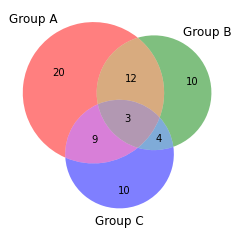

In [93]:
venn3(subsets = (20, 10, 12, 10, 9, 4, 3), set_labels = ('Group A', 'Group B', 'Group C'), alpha = 0.5);

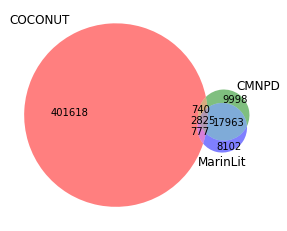

In [104]:
venn3(subsets = (401618, 9998, 740, 8102, 777, 17963, 2825), set_labels = ('COCONUT', 'CMNPD', 'MarinLit'), alpha = 0.5);

In [96]:
# coconut
len(set(coconut['inchikey'])- set(cmnpd)- set(marinlit['InChIKey']))

401618

In [97]:
# cmnpd
len(set(cmnpd)-set(coconut['inchikey'])-  set(marinlit['InChIKey']))

9998

In [98]:
# cmnpd x coconut
len(set(cmnpd).intersection(set(coconut['inchikey']))-  set(marinlit['InChIKey']))

740

In [99]:
# marinlit
len(set(marinlit['InChIKey'])-set(cmnpd)-set(coconut['inchikey']))

8102

In [100]:
# marinlit x coconut
len(set(marinlit['InChIKey']).intersection(set(coconut['inchikey']))-set(cmnpd))

777

In [101]:
# marinlit x cmnpd
len(set(marinlit['InChIKey']).intersection(set(cmnpd))-set(coconut['inchikey']))

17963

In [102]:
# marinlit x cmnpd x coconut
len(set(marinlit['InChIKey']).intersection(set(cmnpd)).intersection(set(coconut['inchikey'])))

2825

In [105]:
!git clone https://github.com/tctianchi/pyvenn.git

Cloning into 'pyvenn'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39
Unpacking objects: 100% (39/39), done.


In [106]:
from pyvenn import venn

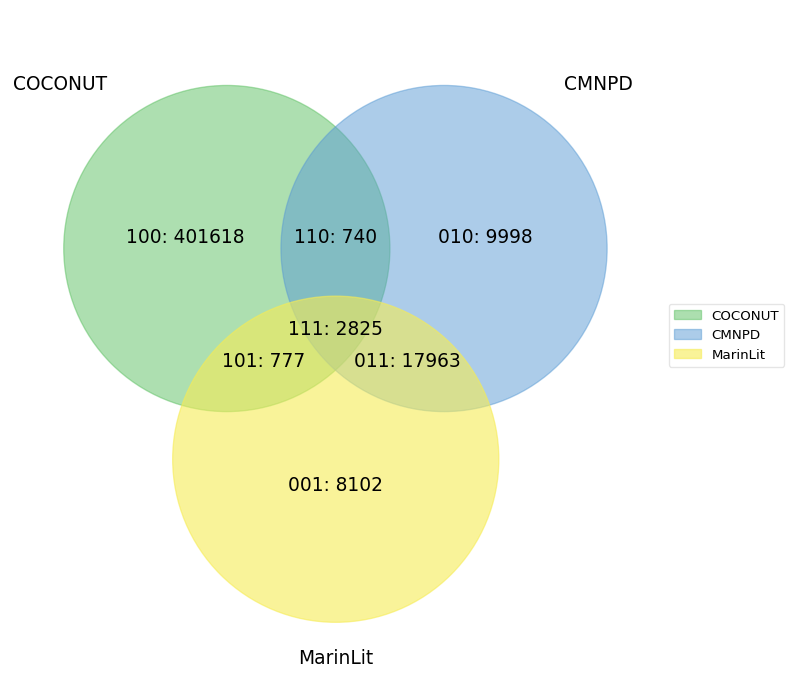

In [108]:
labels = venn.get_labels([coconut['inchikey'], cmnpd, marinlit['InChIKey']], 
                         fill=['number', 'logic'])
fig, ax = venn.venn3(labels, names=['COCONUT', 'CMNPD', 'MarinLit'])

In [139]:
qn = pd.read_csv('entities_img_dataframe_qn.tsv', sep='\t')
qn.head()

,doi,smiles,standardInChIKey,ExactMolWt,pubchem,standardInChI,source
0,Vol32No6_1523_30-AR08438,NaN,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,46.041865,702,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",oscar
1,Vol32No6_1523_30-AR08438,NaN,FAPWRFPIFSIZLT-UHFFFAOYSA-M,57.958622,5234,InChI=1S/ClH.Na/h1H;/q;+1/p-1,oscar
2,Vol32No6_1523_30-AR08438,NaN,HEDRZPFGACZZDS-UHFFFAOYSA-N,117.914383,6212,InChI=1S/CHCl3/c2-1(3)4/h1H,oscar
3,Vol32No6_1523_30-AR08438,NaN,VLKZOEOYAKHREP-UHFFFAOYSA-N,86.109550,8058,"InChI=1S/C6H14/c1-3-5-6-4-2/h3-6H2,1-2H3",oscar
4,NT20170010,NaN,PXHVJJICTQNCMI-UHFFFAOYSA-N,57.935343,935,InChI=1S/Ni,oscar


In [140]:
len(qn['standardInChIKey'].unique())

17946

In [141]:
len(set(coconut['inchikey'].tolist()+cmnpd+marinlit['InChIKey'].tolist()))

442023

In [142]:
len(set(cmnpd+marinlit['InChIKey'].tolist()).intersection(qn['standardInChIKey']))

157

In [150]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('marine_natural_product_comparison_nologic.pdf') as pdf:
    labels = venn.get_labels([coconut['inchikey'], cmnpd, marinlit['InChIKey']], 
                         fill=['number'])
    fig, ax = venn.venn3(labels, names=['COCONUT', 'CMNPD', 'MarinLit'])
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

In [143]:
qn_print = qn.loc[qn['standardInChIKey'].isin(cmnpd+marinlit['InChIKey'].tolist()), 
                  ['doi', 'pubchem', 'ExactMolWt', 'standardInChI', 'smiles']]

smiles = []
for x in qn_print['standardInChI']:
    try:
        smiles.append(Chem.MolToSmiles(Chem.MolFromInchi(x)))
    except:
        smiles.append('')
    
qn_print['smiles'] = smiles

qn_print = qn_print[qn_print['smiles']!='']

qn_print.drop(['standardInChI'], axis=1, inplace=True)
qn_print.reset_index(drop=True, inplace=True)
qn_print.head()

,doi,pubchem,ExactMolWt,smiles
0,Vol35No11_2186_15-AR12464,126,122.036779,O=Cc1ccc(O)cc1
1,Vol32No1_198_34-RV08098,5280435,296.307916,CC(=CCO)CCCC(C)CCCC(C)CCCC(C)C
2,Vol32No1_198_34-RV08098,5280961,270.052823,O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12
3,Vol33No5_1163_29-RV09590,81184,152.131349,C1CCC2=NCCCN2CC1
4,Vol29No3_452_08-AR05036,173183,400.370516,CC(C)C(C)CCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


## Study case example _NPMINE_

In [304]:
qn_print = pd.read_csv('review_newman.tsv', sep='\t')

len(set(cmnpd+marinlit['InChIKey'].tolist()).intersection(qn_print['standardInChIKey']))

50

In [191]:
len(qn_print['smiles'].unique())

323

In [192]:
qn_print = qn_print[['doi', 'pubchem', 'ExactMolWt', 'smiles']]
qn_print['Structure'] = ''

qn_print.head()

,doi,pubchem,ExactMolWt,smiles,Structure
0,pdfs/10.21577_0103-5053.20180016,7074739,210.136828,CC(C[C@@H]1NC(=O)[C@H]2N(C1=O)CCC2)C,
1,pdfs/10.21577_0103-5053.20180016,0,243.113353,*[C@@H]1C[C@@H]2N(C1)C(=O)[C@@H](NC2=O)Cc1ccccc1,
2,pdfs/10.21577_0103-5053.20180016,181567,283.132077,O=C1N[C@@H](Cc2c[nH]c3c2cccc3)C(=O)N2[C@H]1CCC2,
3,pdfs/10.21577_0103-5053.20180016,153274519,323.199762,CCCCCC1=C/C(=C/c2[nH]c(cc2OC)c2ccc[nH]2)/N=C1C,
4,pdfs/10.21577_0103-5053.20180016,0,393.300485,O[C@H]1CCC[C@@H](*)[C@@H]2[C@@H]([C@H](CC1)C)C...,


In [193]:
qn_print.shape

(330, 5)

In [194]:
len(qn_print['smiles'].unique())

323

In [173]:
import json

with open('doi_quim.json') as f:
    dois = json.load(f)

In [128]:
len(dois)

8124

In [130]:
dois

['http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=1&nomeArquivo=sumario-37-2.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=1&nomeArquivo=v37n2a01.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=2&nomeArquivo=v37n2a02.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=3&nomeArquivo=v37n2a03.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=4&nomeArquivo=v37n2a04.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=5&nomeArquivo=v37n2a05.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=6&nomeArquivo=v37n2a06.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=7&nomeArquivo=v37n2a07.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=8&nomeArquivo=v37n2a08.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=9&nomeArquivo=v37n2a09.pdf',
 'http://www.quimicanova.sbq.org.br/audiencia_pdf.asp?aid2=10&nomeArquivo=v37n2a10.pdf',
 'http://www.quimicanova.sb

In [195]:
import os
from rdkit.Chem import Draw

if not os.path.exists('figs'):
    os.mkdir('figs')

for i in qn_print.index:
    try:
        ms = Chem.MolFromSmiles(qn_print.loc[i, 'smiles'])
        Draw.MolToFile(ms,'figs/%s.png' % qn_print.loc[i, 'pubchem'])
    except:
        pass

In [196]:
for i in qn_print.index:
    doi = qn_print.loc[i, 'doi'].replace('_', '/')
    doi = doi.replace('pdfs/', '')
    link = 'https://doi.org/%s' % doi
    qn_print.loc[i, 'doi'] = f'<a href="{link}" target="_blank">{doi}</a>'    
    qn_print.loc[i, 'Structure'] = '<img src="./figs/%s.png" width="100" height="120">' % qn_print.loc[i, 'pubchem']
    qn_print.loc[i, 'pubchem'] = '<a href="https://pubchem.ncbi.nlm.nih.gov/compound/{}" target="_blank">{}</a>'.format(*[int(qn_print.loc[i, 'pubchem']), int(qn_print.loc[i, 'pubchem'])])
    qn_print.loc[i, 'smiles'] = '<a href="https://pubchem.ncbi.nlm.nih.gov/edit3/index.html?smiles={}" target="_blank">{}</a>'.format(*[qn_print.loc[i, 'smiles'], 'PubChem Sketcher'])

In [197]:
html = '''<!DOCTYPE html>
<html>
  <head>
    <meta http-equiv="content-type" content="text/html; charset=UTF-8">
    <title>NPMINE</title>
    <script src="https://cdn.jsdelivr.net/npm/vue/dist/vue.js"></script>
    <script src="https://code.jquery.com/jquery-3.3.1.js" integrity="sha256-2Kok7MbOyxpgUVvAk/HJ2jigOSYS2auK4Pfzbm7uH60=" crossorigin="anonymous"></script>
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>
    <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.6.1/css/all.css" integrity="sha384-gfdkjb5BdAXd+lj+gudLWI+BXq4IuLW5IT+brZEZsLFm++aCMlF1V92rMkPaX4PP" crossorigin="anonymous">
</head>

  <body>
    <!-- A grey horizontal navbar that becomes vertical on small screens -->
    <nav class="navbar navbar-expand-sm bg-light navbar-light">
        <a class="navbar-brand" href="">
        </a>

      <!-- Links-->
      <ul class="navbar-nav">
        <li class="nav-item">
          <a class="nav-link" href="http://ccbl.fcfrp.usp.br">CCBL</a>
        </li>
      </ul>

    </nav>
    <div id="content">

    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>
    <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.6.1/css/all.css" integrity="sha384-gfdkjb5BdAXd+lj+gudLWI+BXq4IuLW5IT+brZEZsLFm++aCMlF1V92rMkPaX4PP" crossorigin="anonymous">

    <script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>

    <script src="https://cdn.datatables.net/1.10.4/js/jquery.dataTables.min.js"></script>
    <link rel="stylesheet" href="https://cdn.datatables.net/1.10.4/css/jquery.dataTables.min.css">
    <script>
    	var dataSet = REPLACE;
        console.log(dataSet);
        $(document).ready(function() {
    	$('#resTable').DataTable( {
            data : dataSet,
    	    // add column definitions to map your json to the table
    	    "columns": [
    		{title: "doi"},
    		{title: "pubchem"},
    		{title: "ExactMolWt"},
    		{title: "smiles"},
            {title: "Structure"}
    	    ]
    	} );
        });
    </script>
    <div class="m-5">
        <table id="resTable" class="table table-striped" style="width:100%" >
		<thead>
	    <tr>
		<th>DOI</th>
		<th>PubChem</th>
		<th>ExactMolWt</th>
		<th>SMILES</th>
		<th>Structure</th>
	    </tr>
	    </thead>
	    </table>
    </div>

    </div>
  </body>
</html>'''

In [198]:
import re

html = re.sub('REPLACE', json.dumps(qn_print.apply(lambda a: a.tolist(), axis=1).tolist()), html)

In [199]:
with open('study_case_example.html', 'w+') as f:
    f.write(html)

In [151]:
17963/29667

0.6054875787912495

## Downloading spectral databases

In [200]:
import requests
import json

In [201]:
txt = requests.get('https://gnps-external.ucsd.edu/gnpslibraryjson').text

In [202]:
gnps = json.loads(txt)
len(gnps)

480495

In [204]:
gnps[0]

{'spectrum_id': 'CCMSLIB00000001547',
 'source_file': '130618_Ger_Jenia_WT-3-Des-MCLR_MH981.4-qb.1.1..mgf',
 'task': '47daa4396adb426eaa5fa54b6ce7dd5f',
 'scan': '1',
 'ms_level': '2',
 'library_membership': 'GNPS-LIBRARY',
 'spectrum_status': '1',
 'peaks_json': 'null',
 'splash': 'splash10-0w2a-0001282259-0001282259',
 'submit_user': 'mwang87',
 'Compound_Name': '3-Des-Microcystein_LR',
 'Ion_Source': 'LC-ESI',
 'Compound_Source': 'Isolated',
 'Instrument': 'qTof',
 'PI': 'Gerwick',
 'Data_Collector': 'Jenia',
 'Adduct': 'M+H',
 'Scan': '-1',
 'Precursor_MZ': '981.54',
 'ExactMass': '0.0',
 'Charge': '0',
 'CAS_Number': 'N/A',
 'Pubmed_ID': 'N/A',
 'Smiles': 'CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=O)C(C)C(NC(=O)C(CCCNC(N)=N)NC(=O)C(C)C(NC1=O)C(O)=O)\\C=C\\C(\\C)=C\\C(C)C(O)Cc1ccccc1)C(O)=O',
 'INCHI': 'N/A',
 'INCHI_AUX': 'N/A',
 'Library_Class': '1',
 'SpectrumID': 'CCMSLIB00000001547',
 'Ion_Mode': 'Positive',
 'create_time': '2019-10-30 21:18:25.0',
 'task_id': 'aa87bf9cd07

In [205]:
gnps_struct = []

for d in gnps:
    if d['INCHI'] != 'N/A' or d['INCHI_AUX'] != 'N/A' or d['Smiles'] != 'N/A':
        gnps_struct.append(d)

In [206]:
len(gnps_struct)

430710

In [208]:
gnps_struct = pd.DataFrame(gnps_struct)

In [209]:
gnps_struct.head()

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Pubmed_ID,Smiles,INCHI,INCHI_AUX,Library_Class,SpectrumID,Ion_Mode,create_time,task_id,user_id
0,CCMSLIB00000001547,130618_Ger_Jenia_WT-3-Des-MCLR_MH981.4-qb.1.1....,47daa4396adb426eaa5fa54b6ce7dd5f,1,2,GNPS-LIBRARY,1,null,splash10-0w2a-0001282259-0001282259,mwang87,...,N/A,CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=...,N/A,N/A,1,CCMSLIB00000001547,Positive,2019-10-30 21:18:25.0,aa87bf9cd0784df9956753f435c32434,null
1,CCMSLIB00000001548,20111105_Anada_Ger_HoiamideB_MH940_qb.1.1..mgf,47daa4396adb426eaa5fa54b6ce7dd5f,1,2,GNPS-LIBRARY,1,null,splash10-00dl-0000011189-0000011189,mwang87,...,N/A,CCC[C@@H](C)[C@@H]([C@H](C)[C@@H]1[C@H]([C@H](...,InChI=1S/C45H73N5O10S3/c1-14-17-24(6)34(52)26(...,N/A,1,CCMSLIB00000001548,Positive,2019-06-04 02:55:49.0,cd4ed49954b94767a54918c340d18fa1,null
2,CCMSLIB00000001549,20111105_Jenia_Ger_MalyngamideC_MH_456_qb.1.1....,47daa4396adb426eaa5fa54b6ce7dd5f,1,2,GNPS-LIBRARY,1,null,splash10-00di-0000900000-0000900000,mwang87,...,N/A,CCCCCCC[C@@H](C/C=C/CCC(=O)NC/C(=C/Cl)/[C@@]12...,InChI=1S/C24H38ClNO5/c1-3-4-5-6-8-11-19(30-2)1...,N/A,1,CCMSLIB00000001549,Positive,2021-03-18 16:28:20.0,48c1656fa4464fea93b71bfd79e0faa5,null
3,CCMSLIB00000001550,20111105_Jenia_Ger_Scytonemin_MH_545_qb.1.1..mgf,47daa4396adb426eaa5fa54b6ce7dd5f,1,2,GNPS-LIBRARY,1,null,splash10-0002-0000190000-0000190000,mwang87,...,N/A,OC1=CC=C(\C=C2\C(=O)C(C3=C4C5=C(C=CC=C5)N=C4\C...,InChI=1S/C36H20N2O4/c39-21-13-9-19(10-14-21)17...,CGZKSPLDUIRCIO-RPCRKUJJSA-N,1,CCMSLIB00000001550,Positive,2019-07-23 10:38:26.0,ca48cf7bc6644f5e89f98d62f114dfea,null
4,CCMSLIB00000001552,20120412_PAVL_FT_Hectochlorin_MCl37H_667_qb.1....,47daa4396adb426eaa5fa54b6ce7dd5f,1,2,GNPS-LIBRARY,1,null,splash10-0a4i-0000119000-0000119000,mwang87,...,N/A,C[C@H]1[C@@H](OC(C2=CSC([C@H](C(C)(OC(C3=CSC([...,,N/A,1,CCMSLIB00000001552,Positive,2019-11-04 11:35:10.0,a3612cf24ba246e5979778166475dc98,null


In [210]:
len(gnps_struct['INCHI_AUX'].unique())

538

In [211]:
Chem

<module 'rdkit.Chem' from '/opt/conda/lib/python3.6/site-packages/rdkit/Chem/__init__.py'>

In [212]:
for i in gnps_struct.index:
    if gnps_struct.loc[i, 'Smiles'] != 'N/A':
        try:
            mol = Chem.MolFromSmiles(gnps_struct.loc[i, 'Smiles'])
            gnps_struct.loc[i, 'INCHI_AUX'] = Chem.InchiToInchiKey(Chem.MolToInchi(mol))
        except:
            continue
    elif gnps_struct.loc[i, 'INCHI'] != 'N/A':
        try:
            gnps_struct.loc[i, 'INCHI_AUX'] = Chem.InchiToInchiKey(gnps_struct.loc[i, 'INCHI'])
        except:
            continue
            

In [213]:
len(gnps_struct['INCHI_AUX'].unique())

26286

In [290]:
len(gnps_struct.loc[gnps_struct['INCHI_AUX']!='N/A', 'INCHI_AUX'].unique())

26285

In [214]:
gnps_struct['Ion_Source'].value_counts()

ESI                                 328165
LC-ESI                               61836
N/A                                  35811
Positive                              1907
LC-ESI-ITFT                           1246
DI-ESI                                 940
                                       411
Negative                               328
LC-ESI-QTOF                             24
LC-APCI                                 15
APCI                                    13
LC-ESI-QQ                                7
LC-ESI-IT                                3
LC-ESI-ITTOF                             3
DIRECT INFUSION NANOESI-ION TRAP         1
Name: Ion_Source, dtype: int64

In [215]:
!wget https://mona.fiehnlab.ucdavis.edu/rest/downloads/retrieve/a9d36510-d72c-441f-886c-509913a4efeb

--2021-08-20 12:04:11--  https://mona.fiehnlab.ucdavis.edu/rest/downloads/retrieve/a9d36510-d72c-441f-886c-509913a4efeb
Resolving mona.fiehnlab.ucdavis.edu (mona.fiehnlab.ucdavis.edu)... 128.120.143.183
Connecting to mona.fiehnlab.ucdavis.edu (mona.fiehnlab.ucdavis.edu)|128.120.143.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘a9d36510-d72c-441f-886c-509913a4efeb’

a9d36510-d72c-441f-     [            <=>     ] 401.11M  1.11MB/s    in 3m 40s  

2021-08-20 12:07:54 (1.82 MB/s) - ‘a9d36510-d72c-441f-886c-509913a4efeb’ saved [420596852]



In [217]:
!unzip a9d36510-d72c-441f-886c-509913a4efeb

Archive:  a9d36510-d72c-441f-886c-509913a4efeb
  inflating: MoNA-export-Experimental_Spectra.json  


In [218]:
with open('MoNA-export-Experimental_Spectra.json') as f:
    mona = json.load(f)

In [219]:
len(mona)

195631

In [248]:
mona[0].keys()

dict_keys(['compound', 'id', 'dateCreated', 'lastUpdated', 'lastCurated', 'metaData', 'score', 'spectrum', 'splash', 'submitter', 'tags'])

In [224]:
mona[0]['compound'][0]['inchiKey']

'NCDNCNXCDXHOMX-XGKFQTDJSA-N'

In [231]:
mona_inchikey = []

for x in mona:
    if 'inchiKey' in x['compound'][0].keys():
        mona_inchikey.append(x['compound'][0]['inchiKey'])
    elif 'inchi' in x['compound'][0].keys():
        mona_inchikey.append(Chem.InchiToInchiKey(x['compound'][0]['inchi']))

In [232]:
len(mona_inchikey)

188425

In [233]:
mona_inchikey[:20]

['NCDNCNXCDXHOMX-XGKFQTDJSA-N',
 'MXNRLFUSFKVQSK-QMMMGPOBSA-N',
 'JFLIEFSWGNOPJJ-JTQLQIEISA-N',
 'MXNRLFUSFKVQSK-QMMMGPOBSA-N',
 'JFLIEFSWGNOPJJ-JTQLQIEISA-N',
 'JFLIEFSWGNOPJJ-JTQLQIEISA-N',
 '',
 'BJGNCJDXODQBOB-SSDOTTSWSA-N',
 'RSPURTUNRHNVGF-IOSLPCCCSA-N',
 'SMILJTIKSGRGNQ-UHFFFAOYSA-N',
 'VGGSWIKXJIQHSQ-UHFFFAOYSA-N',
 'QDLYPONYDBAMAO-UHFFFAOYSA-N',
 'DMZDOOGMHURVGA-UHFFFAOYSA-N',
 'WWVNRPISBOPYKM-UHFFFAOYSA-N',
 'QWDVYTIIMGPYNW-UHFFFAOYSA-N',
 'LPFIKOAXWLXFLD-UHFFFAOYSA-N',
 'GTTMYIFZPHMCPW-UHFFFAOYSA-N',
 'DAZUUTMGODWUIB-UHFFFAOYSA-N',
 'NVWCXYQZGNJXIF-UHFFFAOYSA-N',
 'ALTAXJAXFGIBKH-UHFFFAOYSA-N']

In [234]:
len(set(mona_inchikey))

33070

In [249]:
mona_id = [x['id'] for x in mona]

mona_id[:5]

['MoNA000010', 'MoNA000012', 'MoNA000013', 'MoNA000014', 'MoNA000015']

In [230]:
!wget https://mona.fiehnlab.ucdavis.edu/rest/downloads/static/MoNA-export-All_Spectra-identifier-table-ids.zip

--2021-08-20 12:20:36--  https://mona.fiehnlab.ucdavis.edu/rest/downloads/static/MoNA-export-All_Spectra-identifier-table-ids.zip
Resolving mona.fiehnlab.ucdavis.edu (mona.fiehnlab.ucdavis.edu)... 128.120.143.183
Connecting to mona.fiehnlab.ucdavis.edu (mona.fiehnlab.ucdavis.edu)|128.120.143.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘MoNA-export-All_Spectra-identifier-table-ids.zip’

MoNA-export-All_Spe     [                <=> ]  25.05M  2.59MB/s    in 23s     

2021-08-20 12:21:00 (1.11 MB/s) - ‘MoNA-export-All_Spectra-identifier-table-ids.zip’ saved [26266649]



In [236]:
!unzip MoNA-export-All_Spectra-identifier-table-ids.zip

Archive:  MoNA-export-All_Spectra-identifier-table-ids.zip
  inflating: MoNA-export-All_Spectra-identifier-table.csv  


In [243]:
mona_tab = pd.read_csv('MoNA-export-All_Spectra-identifier-table.csv', sep='\t', header=None)

mona_tab.head()

,0
0,"AU100601,splash10-0a4i-1900000000-d2bc1c887f6f..."
1,"AU100701,splash10-0a4i-1900000000-d2bc1c887f6f..."
2,"AU100801,splash10-0pk9-2970000000-abb9e31dc053..."
3,"AU100802,splash10-0zi0-0590000000-2e8e1e943731..."
4,"AU100803,splash10-0kmi-0950000000-9e91e580b580..."


In [245]:
mona_tab.loc[0,0]

'AU100601,splash10-0a4i-1900000000-d2bc1c887f6f99ed0f74,QKLPUVXBJHRFQZ-UHFFFAOYSA-N,c1cc(ccc1N)S(=O)(=O)Nc2cncc(n2)Cl'

In [ ]:
x['compound'][0]['inchi']

In [283]:
mona_tab.head().apply(lambda a: a.str.split(',')).apply(lambda a: [a[0][0],a[0][2]], axis=1).tolist()

[['AU100601', 'QKLPUVXBJHRFQZ-UHFFFAOYSA-N'],
 ['AU100701', 'XOXHILFPRYWFOD-UHFFFAOYSA-N'],
 ['AU100801', 'ASWVTGNCAZCNNR-UHFFFAOYSA-N'],
 ['AU100802', 'ASWVTGNCAZCNNR-UHFFFAOYSA-N'],
 ['AU100803', 'ASWVTGNCAZCNNR-UHFFFAOYSA-N']]

In [284]:
mona_df = pd.DataFrame(mona_tab.apply(lambda a: a.str.split(',')).apply(lambda a: [a[0][0],a[0][2]], axis=1).tolist())

In [285]:
mona_df.shape

(692370, 2)

In [287]:
mona_df_inchikey = mona_df[mona_df[0].isin(mona_id)]
mona_df_inchikey.shape

(195631, 2)

In [288]:
mona_df_inchikey.head()

,0,1
0,AU100601,QKLPUVXBJHRFQZ-UHFFFAOYSA-N
1,AU100701,XOXHILFPRYWFOD-UHFFFAOYSA-N
2,AU100801,ASWVTGNCAZCNNR-UHFFFAOYSA-N
3,AU100802,ASWVTGNCAZCNNR-UHFFFAOYSA-N
4,AU100803,ASWVTGNCAZCNNR-UHFFFAOYSA-N


In [289]:
len(mona_df_inchikey[1].unique())

37167

## Comparing spectral databases

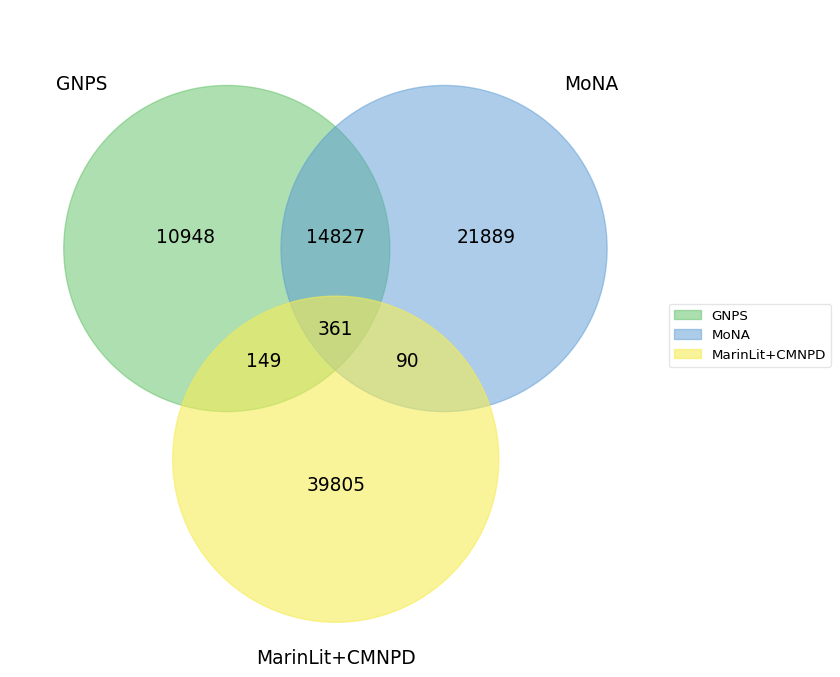

In [291]:
labels = venn.get_labels([gnps_struct.loc[gnps_struct['INCHI_AUX']!='N/A', 'INCHI_AUX'], 
                          mona_df_inchikey[1], cmnpd+marinlit['InChIKey'].tolist()], 
                         fill=['number'])
fig, ax = venn.venn3(labels, names=['GNPS', 'MoNA', 'MarinLit+CMNPD'])

In [292]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('marine_natural_product_on_spectraldb_comparison_nologic.pdf') as pdf:
    labels = venn.get_labels([gnps_struct.loc[gnps_struct['INCHI_AUX']!='N/A', 'INCHI_AUX'], 
                              mona_df_inchikey[1], cmnpd+marinlit['InChIKey'].tolist()], 
                             fill=['number'])
    fig, ax = venn.venn3(labels, names=['GNPS', 'MoNA', 'MarinLit+CMNPD'])
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

In [294]:
14827+21889+361+90

37167

In [295]:
14827+10948+361+149

26285

In [296]:
39805+149+361+90

40405

In [297]:
149+361+90

600

In [298]:
600/40405

0.01484964732087613